In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

$$f(x_1,x_2) = x_1^2+ x_2^2$$

In [2]:
def f(x):
    return x[:,0]**2 + x[:,1]**2

In [3]:
#np.random.seed(0)
x = np.random.uniform([-10],[10], size = (1000,2))

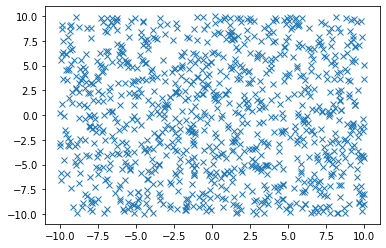

In [4]:
plt.plot(x[:,0],x[:,1],'x')
plt.show()

In [5]:
y = f(x)

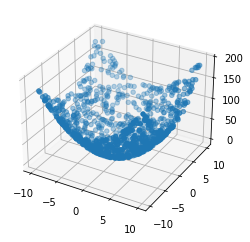

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y)

$$\hat{y} = \hat{W}_1h_1 + \hat{W}_2h_2$$

$$h_1 = \sigma(z_1)$$
$$h_2 = \sigma(z_2)$$

$$z_1 = W_{11}x_1 + W_{12}x_2 + b_1$$
$$z_2 = W_{21}x_1 + W_{22}x_2 +b_2$$

$$\sigma(x) =\frac{1}{1+e^{-x}}$$

In [7]:
def sigma(x):
    return 1/(1+np.exp(-x))

In [8]:
#y = y.reshape((len(y), 1))

# W = [
#     np.array([[0.1,0.15],[0.21,0.12]]),
#     np.array([[0.2,0.13],[0.11,-0.12]]),
#     np.array([[0.11,0.18]]),
# ]

# B = [
#     np.array([0.,0.]),
#     np.array([0.,0.]),
# #    np.array([0.])
# ]
# (2, 10, 1)

# def init_params(layers):
#     W = []
#     B = []
#     for i in range(1, len(layers)):
#         B.append(np.zeros((layers[i],)))
#         W.append(np.random.uniform(0.0, 0.3, size=(layers[i], layers[i-1])))
#     return W, B

# W, B = init_params((2, 10, 1))


W = np.random.uniform(0.0, 0.3, size=(10, 2))
b = np.zeros((10,))
W_hut = np.random.uniform(0.0, 0.3, size=(10,))

print(f"W: {W}\n")
print(f"W_hut: {W_hut}\n")
print(f"b: {b}")

W: [[0.05242955 0.06002418]
 [0.14694879 0.16570385]
 [0.12578267 0.02059123]
 [0.15726429 0.08642235]
 [0.22638259 0.18162001]
 [0.22909158 0.14823599]
 [0.14437718 0.2774867 ]
 [0.27513507 0.26010973]
 [0.07182736 0.25951898]
 [0.19341166 0.21579311]]

W_hut: [0.00196188 0.09117779 0.19846108 0.09893008 0.23750558 0.18086041
 0.25200645 0.20123487 0.21710055 0.13259425]

b: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
# def forward(x):
#     h = x.T
#     for i in range(len(W)):
#         z = W[i].dot(h).T + B[i]
#         h = sigma(z).T
#     return z

def forward(x):
    z = W.dot(x.T).T + b
    h = sigma(z).T
    y_hat = W_hut.dot(h)
    return y_hat

In [10]:
y_hat = forward(x)
print(y_hat.shape)

(1000,)


In [11]:
def update(W, b, W_hut, x, y, lr): 
    lr /= len(x)
    k = 5
     
    #print(f"x:\n{x[:k]}\n\nb:\n{b}\n\nW:\n{W}\n\nW_hut:\n{W_hut}\n")
    
    z = W.dot(x.T).T + b
    h = sigma(z).T
    y_hat = W_hut.dot(h)
    
    #print(f"z:\n{z[:k]}\n\nh:\n{h[:k]}\n\ny_hat:\n{y_hat[:k]}\n")
    
    W_hut_new = W_hut - lr * 2 * (y_hat - y).dot(h.T)
    W_new = W - lr * (((h * (1-h)).T * W_hut).T * 2 * (y_hat - y)).dot(x)
    b_new = b - lr * ((h * (1-h)).T * W_hut).T.dot(2 * (y_hat - y))
    
    #print(f"W_hut_new:\n{W_hut_new}\n\nW_new:\n{W_new}\n\nb_new:\n{b_new}\n")

    return W_new, b_new, W_hut_new

print(update(W, b, W_hut, x, y, 0.1))

(array([[ 0.05491378,  0.05880493],
       [ 0.22788753,  0.08889761],
       [ 0.33615752, -0.09213157],
       [ 0.25111832,  0.0078649 ],
       [ 0.41116106, -0.03667985],
       [ 0.36796144, -0.01395411],
       [ 0.29479074,  0.13349191],
       [ 0.41541029,  0.08294127],
       [ 0.19890501,  0.16980802],
       [ 0.29585952,  0.10244084]]), array([0.00609675, 0.20857214, 0.55596657, 0.24718793, 0.46035375,
       0.3586842 , 0.44255812, 0.32732644, 0.40349856, 0.25917047]), array([6.68039092, 6.79091517, 6.98848141, 6.87520376, 6.9893819 ,
       6.96527263, 6.86876479, 6.91782767, 6.79992749, 6.82800889]))


<http://matrixmultiplication.xyz/>

In [12]:
# def update(W, b, x, y, lr):
#     num_x = len(x)
    
#     num_layers = len(W)
#     #print(num_layers)
#     delta_W = [np.zeros(w.shape) for w in W]
#     delta_B = [np.zeros(b.shape) for b in B]
    
#     # forward
#     z = []
#     h = [x.T]
#     for i in range(len(W)):
#         z.append(W[i].dot(h[-1]).T + B[i])
#         #z = W[i].dot(h[-1]).T + B[i]
#         h.append(sigma(z[-1]).T)
#     #h.append(W[-1].dot(h[-1]).T)
    
#     # compute gradients
#     db = 2*(z[-1] - y)
#     delta_B[-1] = db.sum(axis=0)
#     delta_W[-1] = db.T.dot(h[-2].T)
    
#     for i in range(2, num_layers+1):
#         db = np.dot(db, W[-i+1]) * (h[-i]*(1-h[-i])).T
#         delta_B[-i] = db.sum(axis=0)
#         delta_W[-i] = db.T.dot(h[-i-1].T)
    
#     #print(f"delta_W: {delta_W}")
#     #print(f"delta_B: {delta_B}")
#     # adjust weights and biases
#     W_new = [w - lr/num_x * delta_w for w,delta_w in zip(W, delta_W)]
#     b_new = [b - lr/num_x * delta_b for b,delta_b in zip(B, delta_B)]
    
#     return W_new, b_new

In [13]:
n = 300
lr = 0.01
num_at_once = 10000

for i in range(n):

    start = 0
    while start < len(x):
        W, b, W_hut = update(W, b, W_hut, x[start:start+num_at_once], y[start:start+num_at_once], lr)
        start += num_at_once

    if i % 20 == 0 or i == n-1:
        y_hat = forward(x)
        C = np.sqrt(((y - y_hat)**2)).mean()
        print(f"Epoch {i} cost: {C}")

Epoch 0 cost: 63.12544675229726
Epoch 20 cost: 40.52997386943735
Epoch 40 cost: 37.561946800360836
Epoch 60 cost: 36.00865742060458
Epoch 80 cost: 34.42346763332372
Epoch 100 cost: 32.25138717902207
Epoch 120 cost: 30.233523254886176
Epoch 140 cost: 30.849938840910216
Epoch 160 cost: 27.700677466280517
Epoch 180 cost: 25.626682007198816
Epoch 200 cost: 24.36896463408128
Epoch 220 cost: 22.030059349175527
Epoch 240 cost: 25.834825016389075
Epoch 260 cost: 21.897027223723736
Epoch 280 cost: 20.845843430504573
Epoch 299 cost: 22.281669089698223


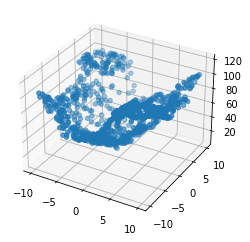

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y_hat)